In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
path = '/home/prasanna/Documents/dataINM.csv'

In [3]:
datam=pd.read_csv(path)

In [4]:
data=datam[datam.Attrition=='No']
datae=datam[datam.Attrition=='Yes']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 1 to 1469
Data columns (total 35 columns):
Age                         1233 non-null int64
Attrition                   1233 non-null object
BusinessTravel              1233 non-null object
DailyRate                   1233 non-null int64
Department                  1233 non-null object
DistanceFromHome            1233 non-null int64
Education                   1233 non-null int64
EducationField              1233 non-null object
EmployeeCount               1233 non-null int64
EmployeeNumber              1233 non-null int64
EnvironmentSatisfaction     1233 non-null int64
Gender                      1233 non-null object
HourlyRate                  1233 non-null int64
JobInvolvement              1233 non-null int64
JobLevel                    1233 non-null int64
JobRole                     1233 non-null object
JobSatisfaction             1233 non-null int64
MaritalStatus               1233 non-null object
MonthlyIncome         

In [5]:
def plotbarchart(df,feature,hue='Gender'):
    st = pd.crosstab(columns=df[feature],index=df[hue],margins=True)
    sns.countplot(df[feature],hue=df[hue])
    
    #print(x)
    row = (st.index)
    col = (st.columns)
    cell_Text = (st.values)
    plt.table(rowLabels=row,cellText=cell_Text,colLabels=col,loc='top')



In [6]:
def plotboxplot(df,feature,spread,hue='Gender'):
    sns.boxplot(x=df[feature],y=df[spread],hue=df[hue])
    x = pd.crosstab(columns=df[feature],index=df[hue],values=df[spread],aggfunc=np.median,margins=True)
    row = (x.index)
    col = (x.columns)
    cell_Text = (x.values)
    plt.table(rowLabels=row,cellText=cell_Text,colLabels=col,loc='top')


In [7]:
lista = ['Department','EducationField','JobLevel' ,'MaritalStatus','NumCompaniesWorked','OverTime'     ,'PerformanceRating']

Problem >Statement
Predict Attrition of Employee

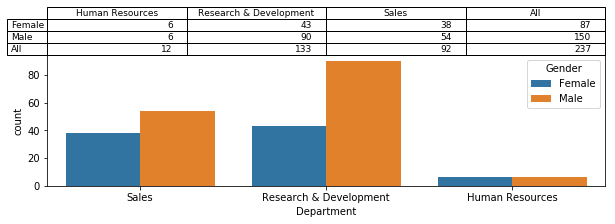

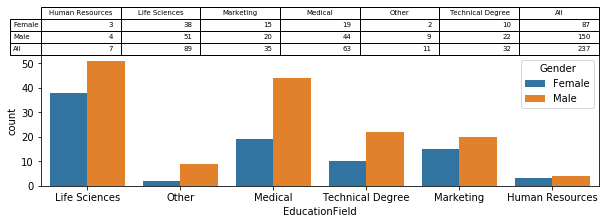

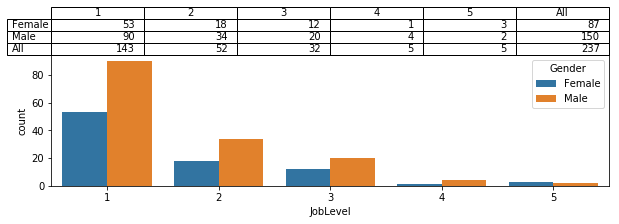

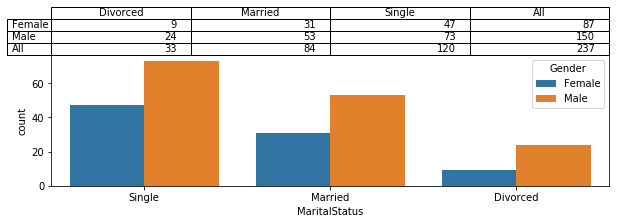

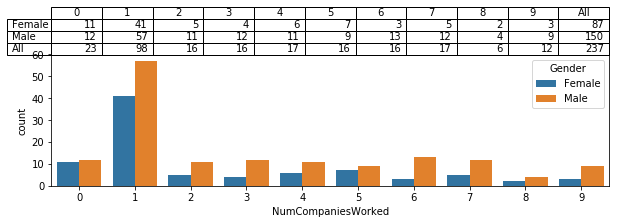

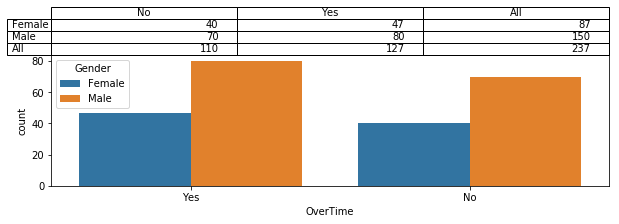

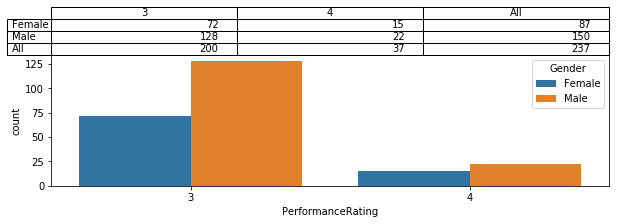

In [8]:
for feature in lista:
    i=1
    plt.figure(figsize=(10,40))
    plt.subplot2grid((2*len(lista),1),(1,0))
    plotbarchart(df=datam[datam.Attrition=='Yes'],feature=feature)
    i = i +2
    #plt.show()


In [9]:
classlist = [['Department','Age'],['Attrition','Age']]
Y=pd.get_dummies(datam.Attrition)['Yes']

In [10]:
continuous_features = ['Age','DailyRate',
            'DistanceFromHome','EnvironmentSatisfaction',
            'HourlyRate','JobInvolvement','JobSatisfaction',
            'NumCompaniesWorked','Education','PercentSalaryHike',
            'PerformanceRating','RelationshipSatisfaction',
            'TotalWorkingYears','TrainingTimesLastYear',
            'WorkLifeBalance','YearsAtCompany',
            'YearsInCurrentRole','YearsSinceLastPromotion',
            'YearsWithCurrManager']
categorical_features = ['BusinessTravel','Gender','JobLevel','MaritalStatus','OverTime']

In [11]:
#importing Independent Data
def add_features_direct(df,list_of_features):
    X = df[list_of_features]
    return X
def add_categorical_features(df,list_of_c_features,X):
    for feat in list_of_c_features:
        Z  =(pd.DataFrame(pd.get_dummies(df[feat])))
        for col in Z.columns:
            Z.rename(columns={col:feat+str(col)},inplace=True)
        #if 1 in (Z.columns.values):
            #Z.rename(columns={1:(feat+'1'),2:(feat+'2'),3:(feat+'3'),4:(feat+'4'),5:(feat+'5')},inplace=True)
            #print(QQ.columns)
        X=X.join(Z)
    return X
    
def comparatio(df,level1,level2,criteria,return_field):
    MedianSalaryByLevelandEdu = pd.crosstab(index=df[level1],
                                            columns=df[level2],
                                            values=df[criteria],
                                            aggfunc=np.mean)
    for level in df[level1].unique():
        for edu in df[level2].unique():
            ret= pd.DataFrame(df[criteria]/ MedianSalaryByLevelandEdu.loc[level][edu])
            ret.rename(columns={criteria:return_field},inplace=True)
        
    return ret

In [12]:
X = add_features_direct(datam,continuous_features)
X = add_categorical_features(datam,categorical_features,X)

In [13]:
avg_tenure = pd.DataFrame(datam.TotalWorkingYears/datam.NumCompaniesWorked).rename(columns={0:'AvgTimeBeforeSwitch'})
avg_tenure.replace(to_replace=np.inf,value=1000,inplace=True)

In [14]:
X = X.join(avg_tenure)

In [15]:
X.info()
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                                1470 non-null int64
DailyRate                          1470 non-null int64
DistanceFromHome                   1470 non-null int64
EnvironmentSatisfaction            1470 non-null int64
HourlyRate                         1470 non-null int64
JobInvolvement                     1470 non-null int64
JobSatisfaction                    1470 non-null int64
NumCompaniesWorked                 1470 non-null int64
Education                          1470 non-null int64
PercentSalaryHike                  1470 non-null int64
PerformanceRating                  1470 non-null int64
RelationshipSatisfaction           1470 non-null int64
TotalWorkingYears                  1470 non-null int64
TrainingTimesLastYear              1470 non-null int64
WorkLifeBalance                    1470 non-null int64
YearsAtCompany                     1470 non-null int64
YearsInCurren

In [16]:
MedianSalaryByLevelandEdu = pd.crosstab(index=datam.JobLevel,columns=datam.Education,values=datam.DailyRate,aggfunc=np.median)

In [17]:
for level in datam.JobLevel.unique():
    for edu in datam.Education.unique():
        datam['CompaRatio1']= datam['DailyRate']/ MedianSalaryByLevelandEdu.loc[level][edu]

In [18]:
MedianSalaryByDeptandLevel = pd.crosstab(index=datam.Department,columns=datam.JobLevel,values=datam.MonthlyRate,aggfunc=np.median)

In [19]:
for level in datam.Department.unique():
    for edu in datam.JobLevel.unique():
        datam['CompaRatio2']= datam['DailyRate']/ MedianSalaryByDeptandLevel.loc[level][edu]

In [20]:
#X.drop(labels=['Female','MaritalStatusMarried','Divorced','No'],inplace=True,axis=1)
#X.drop(labels=['DailyRate'],inplace=True,axis=1)
X.rename(columns={'Yes':'OT'},inplace=True)
#X = X.join(datam.CompaRatio1)
#X = X.join(datam.CompaRatio2)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                                1470 non-null int64
DailyRate                          1470 non-null int64
DistanceFromHome                   1470 non-null int64
EnvironmentSatisfaction            1470 non-null int64
HourlyRate                         1470 non-null int64
JobInvolvement                     1470 non-null int64
JobSatisfaction                    1470 non-null int64
NumCompaniesWorked                 1470 non-null int64
Education                          1470 non-null int64
PercentSalaryHike                  1470 non-null int64
PerformanceRating                  1470 non-null int64
RelationshipSatisfaction           1470 non-null int64
TotalWorkingYears                  1470 non-null int64
TrainingTimesLastYear              1470 non-null int64
WorkLifeBalance                    1470 non-null int64
YearsAtCompany                     1470 non-null int64
YearsInCurren

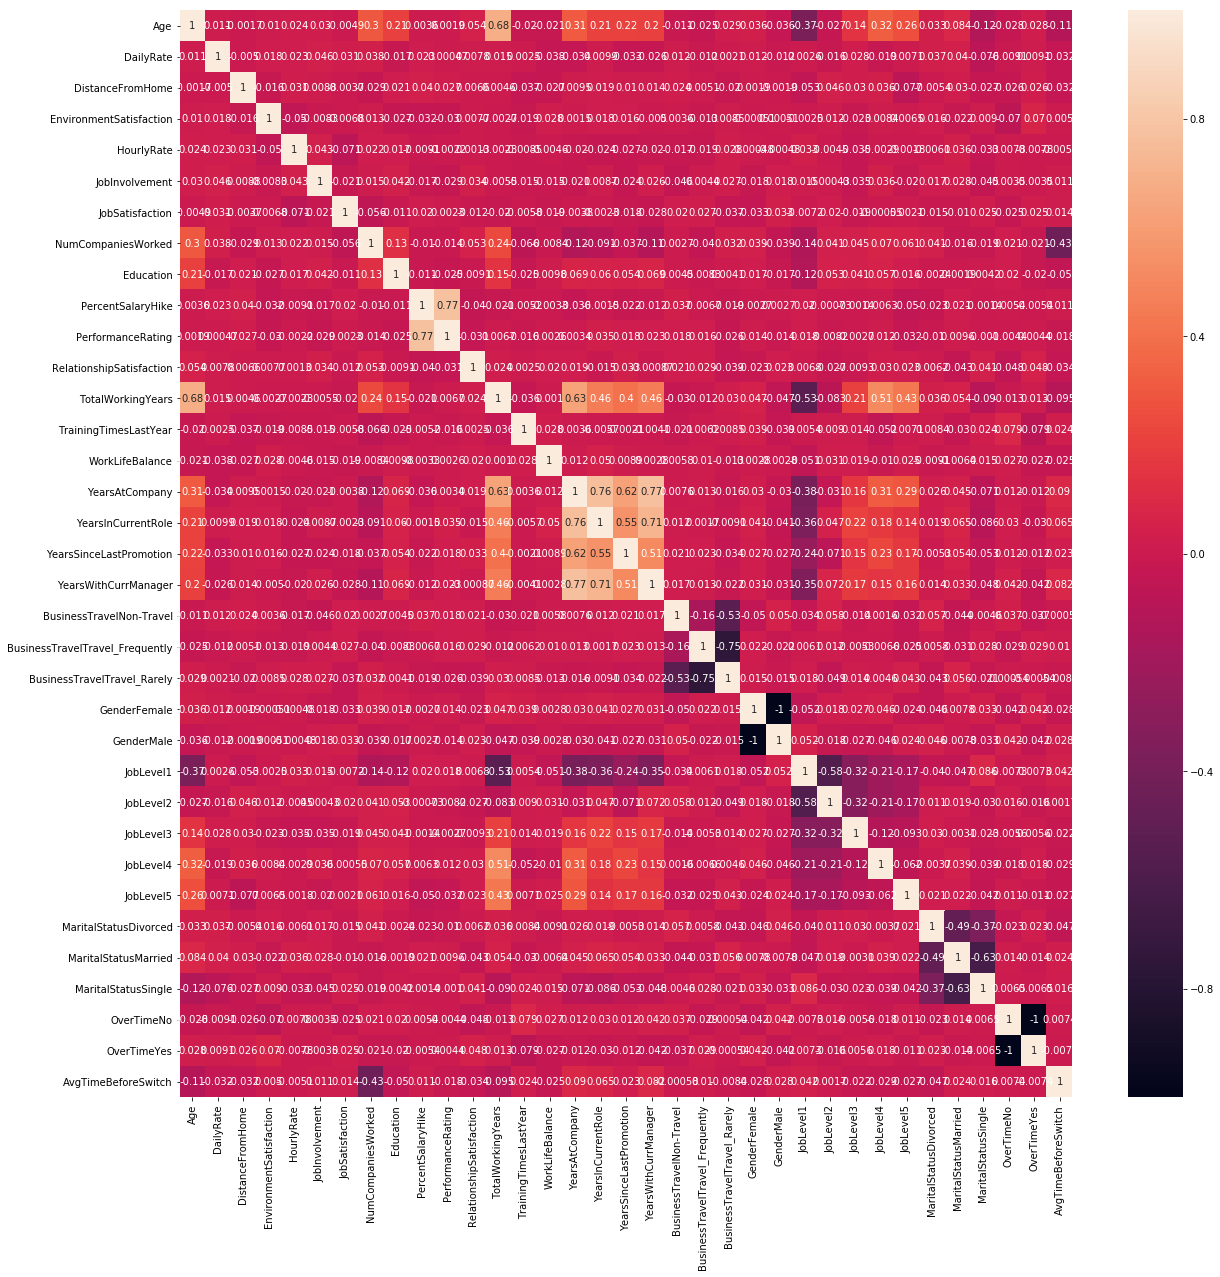

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=X.corr())

In [22]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import recall_score,accuracy_score

In [23]:
(Xtrain,xtest,Ytrain,ytest)=train_test_split(X,Y)

In [24]:
xgb = XGBClassifier(max_depth=1,nthread=-1)
xgb.fit(Xtrain,Ytrain)
ypred = xgb.predict(xtest)
recall_score(ypred,ytest)

/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8571428571428571

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


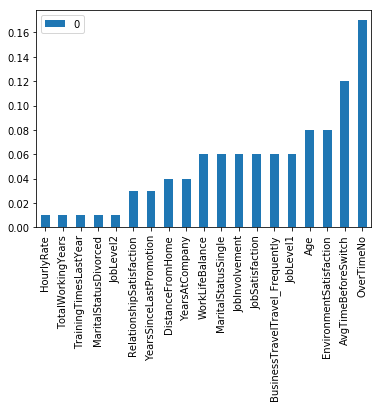

In [25]:
fi = pd.DataFrame(index=X.columns,data=xgb.feature_importances_)
g = fi[fi[0]>0]
g.sort_values(0,axis=0,inplace=True)
g.plot(kind='bar')

<Figure size 2160x2160 with 0 Axes>

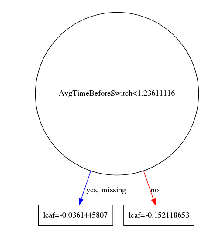

In [26]:
plt.figure(figsize=(30,30))
from xgboost import plot_tree
plot_tree(xgb)

In [27]:
#overfitting test L1
for i in range(1,6):
    dl1 = X[X['JobLevel'+str(i)]==1]
    ypred = xgb.predict(dl1)
    rec = recall_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    acc = accuracy_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    print(len(ypred),rec,acc)

543 0.8409090909090909 0.7918968692449355
534 0.0 0.9026217228464419
218 0.0 0.8532110091743119
106 0.0 0.9528301886792453
69 0.0 0.927536231884058


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/prasanna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an erro

In [28]:
logr = LogisticRegression()

In [29]:
logr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<Figure size 1440x360 with 0 Axes>

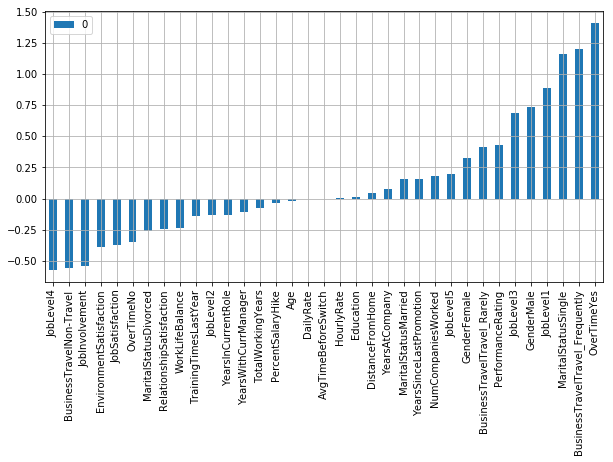

In [30]:

fi = pd.DataFrame(index=X.columns,data=logr.coef_[0])
g = fi
g.sort_values(0,axis=0,inplace=True)
plt.figure(figsize=(20,5))
g.plot(kind='bar',figsize=(10,5),grid=True)

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logr,n_features_to_select=1,verbose=1)

In [55]:
rfe.fit(X,Y)

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 feat

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=1)

In [60]:
pd.DataFrame(X.columns,rfe.ranking_)[pd.DataFrame(X.columns,rfe.ranking_).index<10]

,0
7,JobInvolvement
6,BusinessTravelNon-Travel
5,BusinessTravelTravel_Frequently
2,JobLevel1
8,JobLevel3
4,JobLevel4
3,MaritalStatusSingle
1,OverTimeNo
9,OverTimeYes


The Above Coefficient Chart shyows:
- Features with positive coefficients cause an increase in probability of attrition with increase / presence
- features with negative coefficients cause a decrease in probability of attrition with increae / presence

Some of these factors are actionable whereas others are not actionable 
EG
1. Job Levels are not actionable features as they can not be changed without promotions or causing significant organizational strife
2. Employee Engagement , Job Involvement, Relationship Satisfaction etc can be managed and actioned upon with further analysis
3. "Overtime" seems to cause major issues by its mere presence and needs to be delved into


In [31]:
#overfitting test L1
ypred = logr.predict(xtest)
rec = recall_score(ypred,ytest)
acc = accuracy_score(ypred,ytest)
print(rec,acc)
for i in range(1,6):
    dl1 = X[X['JobLevel'+str(i)]==1]
    ypred = logr.predict(dl1)
    rec = recall_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    acc = accuracy_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    print(rec,acc)

0.84375 0.8967391304347826
0.7010309278350515 0.8084714548802947
0.9166666666666666 0.9213483146067416
0.7272727272727273 0.8761467889908257
0.5 0.9528301886792453
0.0 0.927536231884058


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain)

/home/prasanna/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
ypred = rfc.predict(xtest)
print(recall_score(ypred,ytest),accuracy_score(ypred,ytest))

0.7333333333333333 0.8559782608695652


In [34]:
ypred = rfc.predict(xtest)
rec = recall_score(ypred,ytest)
acc = accuracy_score(ypred,ytest)
print(rec,acc)
for i in range(1,6):
    dl1 = X[X['JobLevel'+str(i)]==1]
    ypred = rfc.predict(dl1)
    rec = recall_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    acc = accuracy_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    print(rec,acc)

0.7333333333333333 0.8559782608695652
0.9736842105263158 0.9355432780847146
0.96875 0.9588014981273408
0.9473684210526315 0.9311926605504587
1.0 1.0
1.0 0.9855072463768116


In [35]:
from sklearn.ensemble.bagging import  BaggingClassifier

bc = BaggingClassifier(base_estimator=rfc,n_estimators=20,max_features=5,n_jobs=-1)
bc.fit(Xtrain,Ytrain)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=5,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [36]:
ypred = bc.predict(xtest)
rec = recall_score(ypred,ytest)
acc = accuracy_score(ypred,ytest)
print(rec,acc)
for i in range(1,6):
    dl1 = X[X['JobLevel'+str(i)]==1]
    ypred = bc.predict(dl1)
    rec = recall_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    acc = accuracy_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    print(rec,acc)

1.0 0.8396739130434783
1.0 0.7955801104972375
1.0 0.9044943820224719
1.0 0.8669724770642202
0.0 0.9528301886792453


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


1.0 0.9420289855072463


In [37]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier([('baggc',bc),('randomF',rfc),('logr',logr)],voting='soft')
vc.fit(Xtrain,Ytrain)


VotingClassifier(estimators=[('baggc', BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [38]:
ypred = vc.predict(xtest)
rec = recall_score(ypred,ytest)
acc = accuracy_score(ypred,ytest)
print(rec,acc)
for i in range(1,6):
    dl1 = X[X['JobLevel'+str(i)]==1]
    ypred = vc.predict(dl1)
    rec = recall_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    acc = accuracy_score(ypred,pd.get_dummies(datam[datam.JobLevel==i]['Attrition'])['Yes'])
    print(len(ypred),rec,acc)

1.0 0.8532608695652174


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


543 1.0 0.8710865561694291


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


534 1.0 0.9213483146067416


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


218 1.0 0.8899082568807339


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


106 1.0 0.9716981132075472


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


69 0.0 0.927536231884058


/home/prasanna/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/prasanna/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [39]:
vc.estimators_

[BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
          bootstrap=True, bootstrap_features=False, max_features=5,
          max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=False,
          random_state=None, verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
  